In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pywaffle import Waffle
import numpy as np
from pySankey.sankey import sankey
from wordcloud import WordCloud, STOPWORDS

## Harry Potter dataset
---

- Reproduire le graphique de l'image IMG_0117.jpeg 

In [69]:
df_HP = pd.read_csv('HP_CHAR.csv')
print(df_HP.columns)
print(df_HP.shape)
df_HP.head()

Index(['Name', 'Link', 'Descr', 'Gender', 'Species/Race', 'Blood', 'School',
       'Profession'],
      dtype='object')
(1281, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
0,Mrs. Abbott,https://www.hp-lexicon.org/character/abbott-fa...,"Mrs. Abbott was the mother of Hannah Abbott, a...",Female,witch,Muggle-born,Unknown,Unknown
1,Hannah Abbott,https://www.hp-lexicon.org/character/abbott-fa...,Hannah Abbott is a Hufflepuff student in Harry...,Female,witch,Half-blood,Hogwarts - Hufflepuff,Landlady of the Leaky Cauldron
2,Abel Treetops,https://www.hp-lexicon.org/character/abel-tree...,Abel Treetops was a wizard from Cincinnati who...,Male,wizard,Unknown,Unknown,Unknown
3,Euan Abercrombie,https://www.hp-lexicon.org/character/abercromb...,Euan Abercrombie was a small boy with prominen...,Male,wizard,Unknown,Hogwarts - Gryffindor,Unknown
4,Aberforth Dumbledore,https://www.hp-lexicon.org/character/dumbledor...,"Aberforth Dumbledore was a tall, thin, grumpy-...",Male,wizard,Half-blood,Hogwarts - Student,Barman


In [3]:
df_Hufflepuff = df_HP[df_HP['School'].str.contains('Hufflepuff', na=False)]
print(df_Hufflepuff.shape)
df_Hufflepuff.head()

(19, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
1,Hannah Abbott,https://www.hp-lexicon.org/character/abbott-fa...,Hannah Abbott is a Hufflepuff student in Harry...,Female,witch,Half-blood,Hogwarts - Hufflepuff,Landlady of the Leaky Cauldron
98,Artemisia Lufkin,https://www.hp-lexicon.org/character/artemisia...,Artemisia Lufkin was the first witch to become...,Female,witch,Unknown,Hogwarts - Hufflepuff,Minister of Magic
225,Susan Bones,https://www.hp-lexicon.org/character/bones-fam...,"Student at Hogwarts, 1991-1998 (PS7); sorted i...",Female,witch,Half-blood,Hogwarts - Hufflepuff,Unknown
249,Bridget Wenlock,https://www.hp-lexicon.org/character/bridget-w...,"Bridget Wenlock was a famous arithmancer, note...",Female,witch,Unknown,Hogwarts - Hufflepuff,Arithmancer
269,Cadwallader,https://www.hp-lexicon.org/character/cadwallader/,Cadwallader is a burly Chaser on the Hufflepuf...,Male,wizard,Unknown,Hogwarts - Hufflepuff,Unknown


In [4]:
df_Gryffindor = df_HP[df_HP['School'].str.contains('Gryffindor', na=False)]
print(df_Gryffindor.shape)
df_Gryffindor.head()

(52, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
3,Euan Abercrombie,https://www.hp-lexicon.org/character/abercromb...,Euan Abercrombie was a small boy with prominen...,Male,wizard,Unknown,Hogwarts - Gryffindor,Unknown
32,Albus Dumbledore,https://www.hp-lexicon.org/character/dumbledor...,Albus Dumbledore was the Headmaster of Hogwart...,Male,wizard,Half-blood,Hogwarts - Staff\Hogwarts - Gryffindor,Headmaster at Hogwarts School
41,Alicia Spinnet,https://www.hp-lexicon.org/character/alicia-sp...,Alicia Spinnet was a Gryffindor girl two years...,Female,witch,Unknown,Hogwarts - Gryffindor,Unknown
57,Andrew Kirke,https://www.hp-lexicon.org/character/andrew-ki...,Andrew Kirke was a Gryffindor in the mid 1990s...,Male,wizard,Unknown,Hogwarts - Gryffindor,Unknown
60,Angelina Johnson,https://www.hp-lexicon.org/character/angelina-...,"Angelina Johnson is a tall, black (GF16) Gryff...",Female,witch,Unknown,Hogwarts - Gryffindor,Unknown


In [5]:
df_Ravenclaw = df_HP[df_HP['School'].str.contains('Ravenclaw', na=False)]
print(df_Ravenclaw.shape)
df_Ravenclaw.head()

(33, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
10,Stewart Ackerley,https://www.hp-lexicon.org/character/stewart-a...,Stewart Ackerley was a Ravenclaw student who s...,Male,wizard,Unknown,Hogwarts - Ravenclaw,Unknown
68,Anthony Goldstein,https://www.hp-lexicon.org/character/goldstein...,Anthony Goldstein was a Ravenclaw student in H...,Male,wizard,Half-blood,Hogwarts - Ravenclaw,Unknown
123,Millicent Bagnold,https://www.hp-lexicon.org/character/millicent...,Millicent Bagnold was Minister of Magic before...,Female,witch,Unknown,Hogwarts - Ravenclaw,Politician
241,Bradley,https://www.hp-lexicon.org/character/bradley/,Bradley was a Hogwarts student in Ravenclaw Ho...,Male,wizard,Unknown,Hogwarts - Ravenclaw,Unknown
277,Eddie Carmichael,https://www.hp-lexicon.org/character/eddie-car...,Eddie Carmichael was a Hogwarts student who ea...,Male,wizard,Unknown,Hogwarts - Ravenclaw,Unknown


In [6]:
df_Slytherin = df_HP[df_HP['School'].str.contains('Slytherin', na=False)]
print(df_Slytherin.shape)
df_Slytherin.head()

(58, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
12,Adrian Pucey,https://www.hp-lexicon.org/character/adrian-pu...,Adrian Pucey is a Chaser on the Slytherin Quid...,Male,wizard,Unknown,Hogwarts - Slytherin,Unknown
33,Albus Potter,https://www.hp-lexicon.org/character/potter-fa...,Albus Potter is the middle child and second so...,Male,wizard,Half-blood,Hogwarts - Slytherin,Unknown
46,Alphard Black,https://www.hp-lexicon.org/character/black-fam...,Alphard Black was an uncle to Sirius and Regul...,Male,wizard,Pure blood,Hogwarts - Slytherin,Unknown
58,Andromeda Tonks,https://www.hp-lexicon.org/character/black-fam...,Andromeda Tonks was the mother of Nymphadora T...,Female,witch,Pure blood,Hogwarts - Slytherin,Unknown
81,Arcturus Black (1884),https://www.hp-lexicon.org/character/black-fam...,Arcturus Black (1884) was the son of Phineas N...,Male,wizard,Pure blood,Hogwarts - Slytherin,Unknown


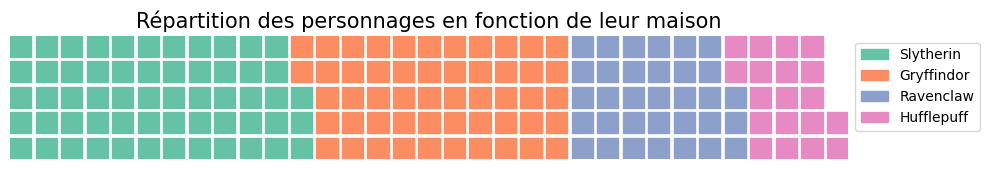

In [7]:
# creation of a dataframe 
data ={'Houses': ['Slytherin', 'Gryffindor', 'Ravenclaw', 'Hufflepuff'], 
       'Students': [df_Slytherin.shape[0], df_Gryffindor.shape[0], df_Ravenclaw.shape[0], df_Hufflepuff.shape[0]] 
     }
  
df = pd.DataFrame(data) 
  
# To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle,
    rows = 5, 
    values = df.Students, 
    labels = list(df.Houses),
    figsize = (10, 5),
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 10},
    title = {'label': 'Répartition des personnages en fonction de leur maison', 'loc': 'center', 'fontsize': 15}
) 

#### Pie Chart (espèce/moldu/sang-pur)
---

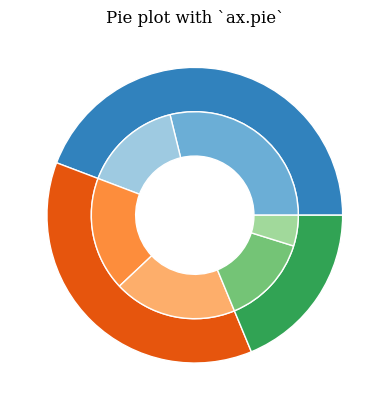

In [153]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

tab20c = plt.color_sequences["tab20c"]
outer_colors = [tab20c[i] for i in [0, 4, 8]]
inner_colors = [tab20c[i] for i in [1, 2, 5, 6, 9, 10]]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

IndexError: Too many levels: Index has only 1 level, not 2

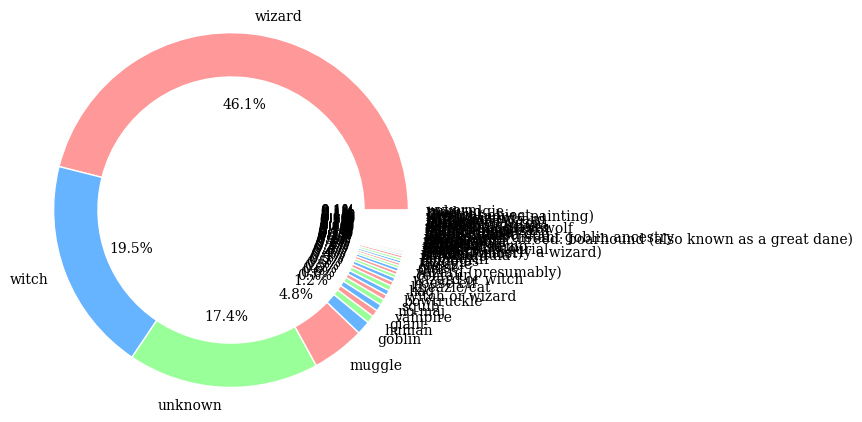

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Subcategory': ['X', 'Y', 'X', 'Z', 'Y', 'Z'],
    'Value': [40, 60, 30, 70, 50, 50]
}

df = pd.DataFrame(data)

# Aggregate values for main categories
# category_totals = df.groupby('Category')['Value'].sum()

# Aggregate values for subcategories
subcategory_totals = df.groupby(['Category', 'Subcategory'])['Value'].sum()

data_race = df_HP['Species/Race'].value_counts()
data_blood = df_HP['Blood'].value_counts()

# Define colors for each category
category_colors = ['#ff9999','#66b3ff','#99ff99']  # Colors for main categories
subcategory_colors = ['#ffcccc', '#ff6666', '#66ccff', '#3399ff', '#99ff99', '#66ff66']  # Colors for subcategories

# Create Pie Chart
fig, ax = plt.subplots()

# Outer Pie (Main Categories)
ax.pie(data_race, labels=data_race.index, radius=1.2, colors=category_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')

# Inner Pie (Subcategories)
ax.pie(data_blood, labels=data_blood.index.get_level_values(1), radius=0.9,
       colors=subcategory_colors, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')

# Display chart
plt.title("Nested Pie Chart (Categories and Subcategories)")
plt.show()


#### Sankey Maison -> Profession
---

In [102]:
df_trie_par_maison = df_HP[df_HP['School'].isin(['Hogwarts - Slytherin', 'Hogwarts - Hufflepuff', 'Hogwarts - Gryffindor', 'Hogwarts - Ravenclaw'])]
print(df_trie_par_maison.shape)
df_trie_par_maison.head()

(149, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
1,Hannah Abbott,https://www.hp-lexicon.org/character/abbott-fa...,Hannah Abbott is a Hufflepuff student in Harry...,Female,witch,Half-blood,Hogwarts - Hufflepuff,Landlady of the Leaky Cauldron
3,Euan Abercrombie,https://www.hp-lexicon.org/character/abercromb...,Euan Abercrombie was a small boy with prominen...,Male,wizard,Unknown,Hogwarts - Gryffindor,Unknown
10,Stewart Ackerley,https://www.hp-lexicon.org/character/stewart-a...,Stewart Ackerley was a Ravenclaw student who s...,Male,wizard,Unknown,Hogwarts - Ravenclaw,Unknown
12,Adrian Pucey,https://www.hp-lexicon.org/character/adrian-pu...,Adrian Pucey is a Chaser on the Slytherin Quid...,Male,wizard,Unknown,Hogwarts - Slytherin,Unknown
33,Albus Potter,https://www.hp-lexicon.org/character/potter-fa...,Albus Potter is the middle child and second so...,Male,wizard,Half-blood,Hogwarts - Slytherin,Unknown


In [103]:
df_trie_par_maison_sans_Unknown = df_trie_par_maison[df_trie_par_maison['Profession'] != 'Unknown']
print(df_trie_par_maison_sans_Unknown.shape)
df_trie_par_maison_sans_Unknown.head()

(49, 8)


,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
1,Hannah Abbott,https://www.hp-lexicon.org/character/abbott-fa...,Hannah Abbott is a Hufflepuff student in Harry...,Female,witch,Half-blood,Hogwarts - Hufflepuff,Landlady of the Leaky Cauldron
98,Artemisia Lufkin,https://www.hp-lexicon.org/character/artemisia...,Artemisia Lufkin was the first witch to become...,Female,witch,Unknown,Hogwarts - Hufflepuff,Minister of Magic
101,Arthur Weasley,https://www.hp-lexicon.org/character/weasley-f...,"An easy-going, middle-aged wizard with a passi...",Male,wizard,Pure blood,Hogwarts - Gryffindor,Ministry of Magic employee
123,Millicent Bagnold,https://www.hp-lexicon.org/character/millicent...,Millicent Bagnold was Minister of Magic before...,Female,witch,Unknown,Hogwarts - Ravenclaw,Politician
175,Bill Weasley,https://www.hp-lexicon.org/character/weasley-f...,William Arthur Weasley (Bill) is the oldest ch...,Male,wizard,Pure blood,Hogwarts - Gryffindor,Curse Breaker at Gringotts


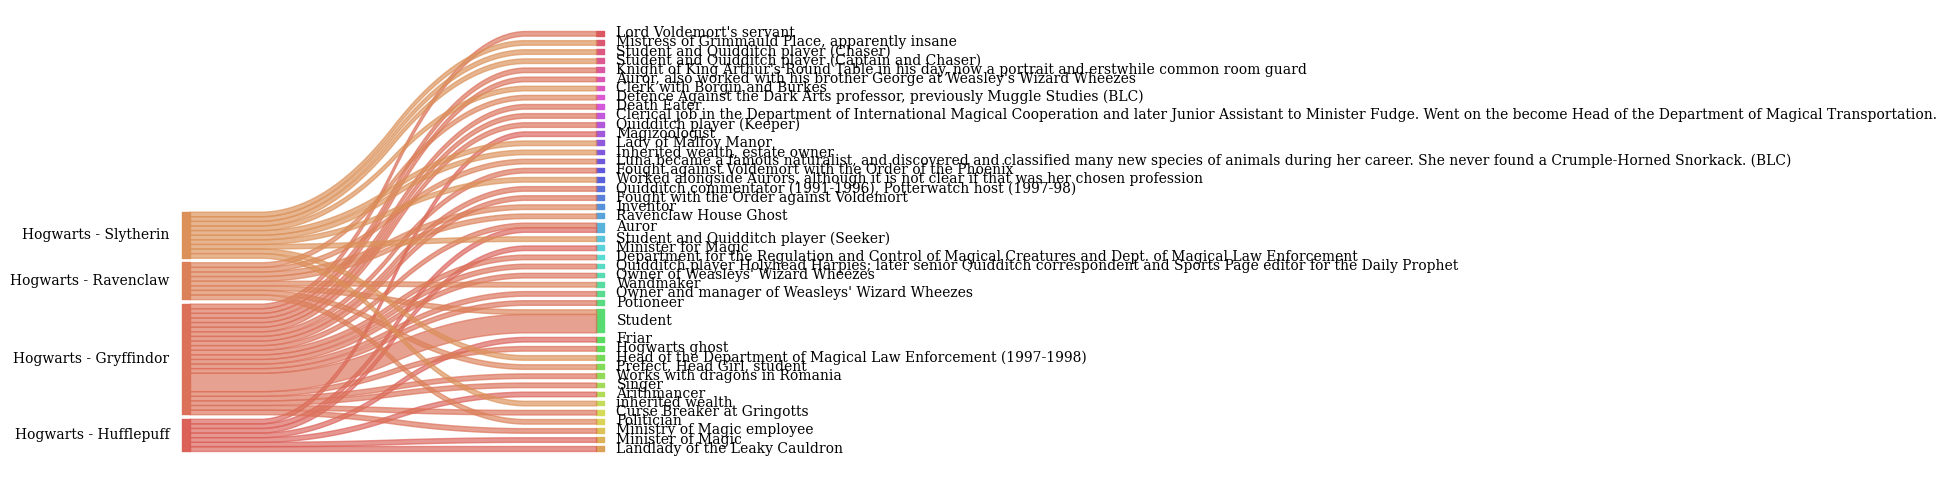

In [104]:
sankey(
    left=df_trie_par_maison_sans_Unknown["School"], right=df_trie_par_maison_sans_Unknown["Profession"], 
    aspect=50, fontsize=10
)
# Temps : 0.3s

#### Wordclouds des descriptions pour chaque maison
---

In [ ]:
# Création de la liste des mots pour chaque maison
text_Slytherin=(df_Slytherin['Descr'].str.cat(sep=' '))
text_Gryffindor=(df_Gryffindor['Descr'].str.cat(sep=' '))
text_Ravenclaw=(df_Ravenclaw['Descr'].str.cat(sep=' '))
text_Hufflepuff=(df_Hufflepuff['Descr'].str.cat(sep=' '))

In [ ]:
STOPWORDS.add(["BFT", "GF27", "S"])

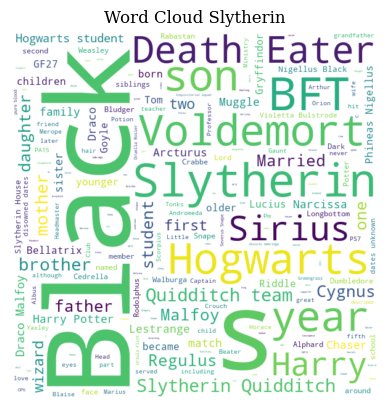

In [123]:
# Create the wordcloud object
wordcloud_Slytherin = WordCloud(width=600, height=600, margin=10, background_color="white", stopwords=STOPWORDS).generate(text_Slytherin)

# Display the generated image:
plt.imshow(wordcloud_Slytherin, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud Slytherin')
plt.show()

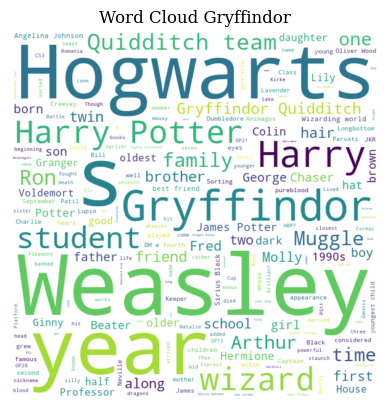

In [124]:
# Create the wordcloud object
wordcloud_Gryffindor = WordCloud(width=600, height=600, margin=10, background_color="white", stopwords=STOPWORDS).generate(text_Gryffindor)

# Display the generated image:
plt.imshow(wordcloud_Gryffindor, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud Gryffindor')
plt.show()

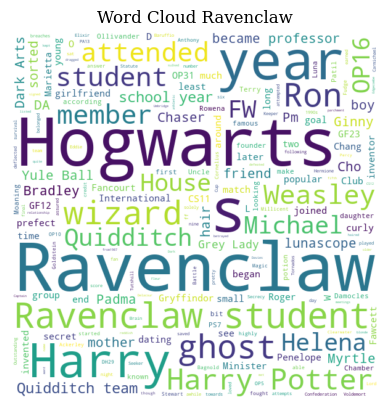

In [125]:
# Create the wordcloud object
wordcloud_Ravenclaw = WordCloud(width=600, height=600, margin=10, background_color="white", stopwords=STOPWORDS).generate(text_Ravenclaw)

# Display the generated image:
plt.imshow(wordcloud_Ravenclaw, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud Ravenclaw')
plt.show()

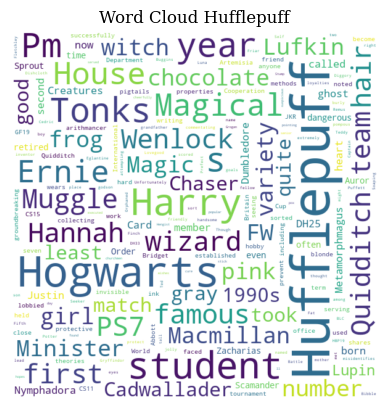

In [126]:
# Create the wordcloud object
wordcloud_Hufflepuff = WordCloud(width=600, height=600, margin=10, background_color="white", stopwords=STOPWORDS).generate(text_Hufflepuff)

# Display the generated image:
plt.imshow(wordcloud_Hufflepuff, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud Hufflepuff')
plt.show()

## Course de canard
---

- Consigne : photo IMG_0117 (1).jpeg

In [107]:
df_Duck=pd.read_csv('duck_race_game.csv', sep=',')
print(df_Duck.shape)
df_Duck.head()

(1000, 7)


,,,,,,,,,Winner,Standing,Pole,Fatest_lap,City,Overtaking,Lap_nb
Raiducknen,['Raiducknen','Duckmilton','Prostduck','Schumaduck','Duckberg','Verstaduck','Ayrduck','Alonsduck','Buckton','Ducktel'],Ayrduck,56,Madrid,48,17
Alonsduck,['Alonsduck','Ducktel','Duckmilton','Verstaduck','Ayrduck','Raiducknen','Schumaduck','Duckberg','Prostduck','Buckton'],Buckton,52,Singapour,49,14
Duckmilton,['Duckmilton','Verstaduck','Schumaduck','Prostduck','Raiducknen','Ducktel','Duckberg','Alonsduck','Buckton','Ayrduck'],Ducktel,58,Moscou,40,20
Schumaduck,['Schumaduck','Duckmilton','Prostduck','Alonsduck','Ducktel','Verstaduck','Buckton','Raiducknen','Duckberg','Ayrduck'],Prostduck,52,New York,41,19
Duckmilton,['Duckmilton','Raiducknen','Ayrduck','Prostduck','Schumaduck','Verstaduck','Alonsduck','Duckberg','Ducktel','Buckton'],Prostduck,50,Paris,45,16


In [108]:
df_Duck.columns

Index(['Winner', ' Standing', ' Pole', ' Fatest_lap', ' City', ' Overtaking',
       ' Lap_nb'],
      dtype='object')

#### 1 -
---

In [109]:
df_Duck[' City'].value_counts()

 City
Londres      91
Paris        88
Pekin        87
Moscou       86
Rio          86
Berlin       86
Madrid       83
New York     82
Tokyo        81
Berne        80
Singapour    78
Rome         72
Name: count, dtype: int64

In [110]:
df_ville_europe = df_Duck[df_Duck[' City'].isin([' Paris', ' Londres', ' Berlin', ' Madrid', ' Rome', ' Berne'])]
print(df_ville_europe.shape)
df_ville_europe.head()

(500, 7)


Winner  \
Raiducknen ['Raiducknen' 'Duckmilton' 'Prostduck'  'Schumaduck' 'Duckberg'   'Verstaduck' 'Ayrduck'    'Alonsduck'       'Buckton'   
Duckmilton ['Duckmilton' 'Raiducknen' 'Ayrduck'    'Prostduck'  'Schumaduck' 'Verstaduck' 'Alonsduck'  'Duckberg'        'Ducktel'   
Buckton    ['Buckton'    'Duckmilton' 'Verstaduck' 'Schumaduck' 'Alonsduck'  'Duckberg'   'Raiducknen' 'Ducktel'       'Prostduck'   
Duckmilton ['Duckmilton' 'Schumaduck' 'Verstaduck' 'Prostduck'  'Raiducknen' 'Buckton'    'Ducktel'    'Ayrduck'       'Alonsduck'   
                         'Ayrduck'    'Ducktel'    'Verstaduck' 'Duckberg'   'Alonsduck'  'Buckton'    'Schumaduck'   'Raiducknen'   

                                                                                                                          Standing  \
Raiducknen ['Raiducknen' 'Duckmilton' 'Prostduck'  'Schumaduck' 'Duckberg'   'Verstaduck' 'Ayrduck'    'Alonsduck'      'Ducktel']   
Duckmilton ['Duckmilton' 'Raiducknen' 'Ayrduck'    'Prostduck'  'Schumaduck' 'Verstaduck' 'Alonsduck'  'Duckberg'       'Buckton']   
Buckton    ['Buckton'    'Duckmilton' 'Verstaduck' 'Schumaduck' 'Alonsduck'  'Duckberg'   'Raiducknen' 'Ducktel'        'Ayrduck']   
Duckmilton ['Duckmilton' 'Schumaduck' 'Verstaduck' 'Prostduck'  'Raiducknen' 'Buckton'    'Ducktel'    'Ayrduck'       'Duckberg']   
                         'Ayrduck'    'Ducktel'    'Verstaduck' 'Duckberg'   'Alonsduck'  'Buckton'    'Schumaduck'   'Prostduck']   

                                                                                                                            Pole  \
Raiducknen ['Raiducknen' 'Duckmilton' 'Prostduck'  'Schumaduck' 'Duckberg'   'Verstaduck' 'Ayrduck'    'Alonsduck'       Ayrduck   
Duckmilton ['Duckmilton' 'Raiducknen' 'Ayrduck'    'Prostduck'  'Schumaduck' 'Verstaduck' 'Alonsduck'  'Duckberg'      Prostduck   
Buckton    ['Buckton'    'Duckmilton' 'Verstaduck' 'Schumaduck' 'Alonsduck'  'Duckberg'   'Raiducknen' 'Ducktel'      Schumaduck   
Duckmilton ['Duckmilton' 'Schumaduck' 'Verstaduck' 'Prostduck'  'Raiducknen' 'Buckton'    'Ducktel'    'Ayrduck'       Prostduck   
                         'Ayrduck'    'Ducktel'    'Verstaduck' 'Duckberg'   'Alonsduck'  'Buckton'    'Schumaduck'      Ayrduck   

                                                                                                                      Fatest_lap  \
Raiducknen ['Raiducknen' 'Duckmilton' 'Prostduck'  'Schumaduck' 'Duckberg'   'Verstaduck' 'Ayrduck'    'Alonsduck'            56   
Duckmilton ['Duckmilton' 'Raiducknen' 'Ayrduck'    'Prostduck'  'Schumaduck' 'Verstaduck' 'Alonsduck'  'Duckberg'             50   
Buckton    ['Buckton'    'Duckmilton' 'Verstaduck' 'Schumaduck' 'Alonsduck'  'Duckberg'   'Raiducknen' 'Ducktel'              59   
Duckmilton ['Duckmilton' 'Schumaduck' 'Verstaduck' 'Prostduck'  'Raiducknen' 'Buckton'    'Ducktel'    'Ayrduck'              56   
                         'Ayrduck'    'Ducktel'    'Verstaduck' 'Duckberg'   'Alonsduck'  'Buckton'    'Schumaduck'           57   

                                                                                                                         City  \
Raiducknen ['Raiducknen' 'Duckmilton' 'Prostduck'  'Schumaduck' 'Duckberg'   'Verstaduck' 'Ayrduck'    'Alonsduck'     Madrid   
Duckmilton ['Duckmilton' 'Raiducknen' 'Ayrduck'    'Prostduck'  'Schumaduck' 'Verstaduck' 'Alonsduck'  'Duckberg'       Paris   
Buckton    ['Buckton'    'Duckmilton' 'Verstaduck' 'Schumaduck' 'Alonsduck'  'Duckberg'   'Raiducknen' 'Ducktel'       Berlin   
Duckmilton ['Duckmilton' 'Schumaduck' 'Verstaduck' 'Prostduck'  'Raiducknen' 'Buckton'    'Ducktel'    'Ayrduck'       Madrid   
                         'Ayrduck'    'Ducktel'    'Verstaduck' 'Duckberg'   'Alonsduck'  'Buckton'    'Schumaduck'   Londres   

                                                                                                                      Overtaking  \
Raiducknen ['Raiduckn

<Axes: xlabel=' City'>

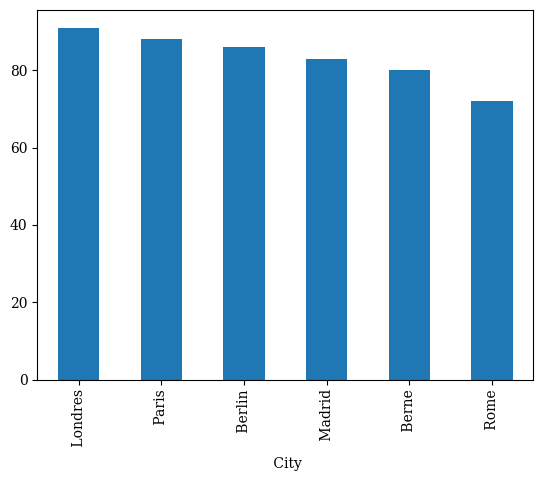

In [111]:
df_ville_europe[' City'].value_counts().plot(kind='bar')

#### 2 -
---